In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sns
import statsmodels.api as sm

In [3]:
# DATA COLLECTION
data = pd.read_csv(r'C:\Users\sweet\Desktop\DataScience\MS office files\CSV files\Housing.csv')

In [4]:
# DATA INSPECTION
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.shape

(545, 13)

In [8]:
# DATA CLEANING
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

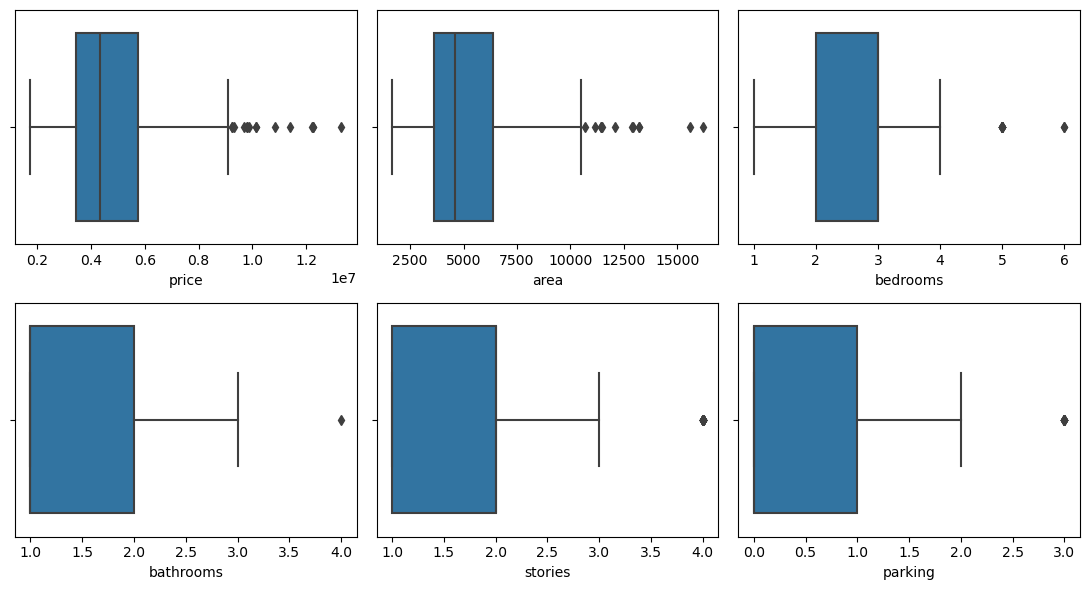

In [9]:
#Data Visualization
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (11,6))
    sns.boxplot(x=data['price'], ax = axs[0,0])
    sns.boxplot(x=data['area'], ax = axs[0,1])
    sns.boxplot(x=data['bedrooms'], ax = axs[0,2])
    sns.boxplot(x=data['bathrooms'], ax = axs[1,0])
    sns.boxplot(x=data['stories'], ax = axs[1,1])
    sns.boxplot(x=data['parking'], ax = axs[1,2])
    plot.tight_layout()
    plot.show()
    
detectOutliers()

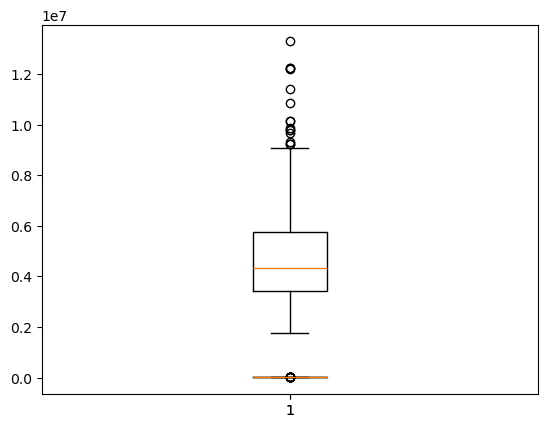

In [10]:
# Outliers reduction for Price & Area
plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3-Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 +1.5*IQR)]

plot.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 +1.5*IQR)]

C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

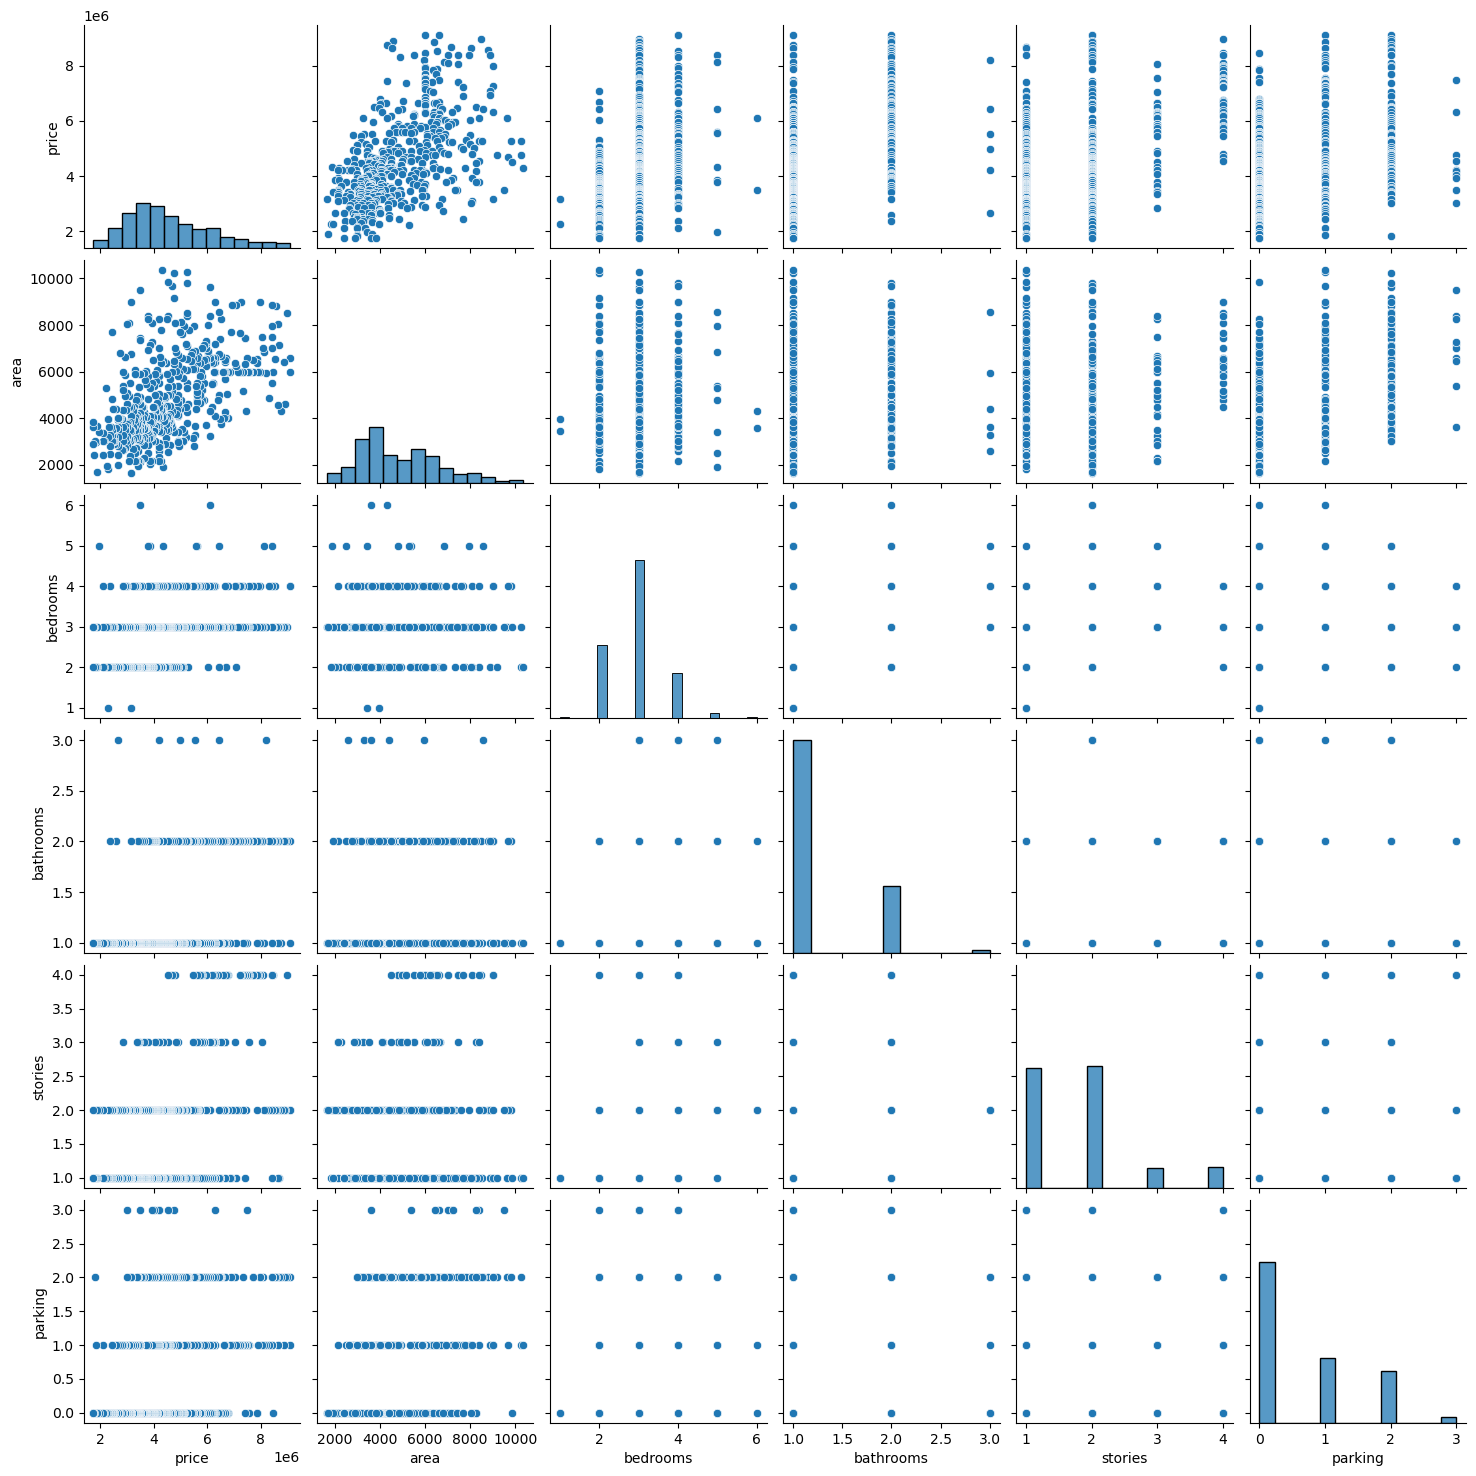

In [11]:
#Visualization using Pairplot
sns.pairplot(data)
plot.show()

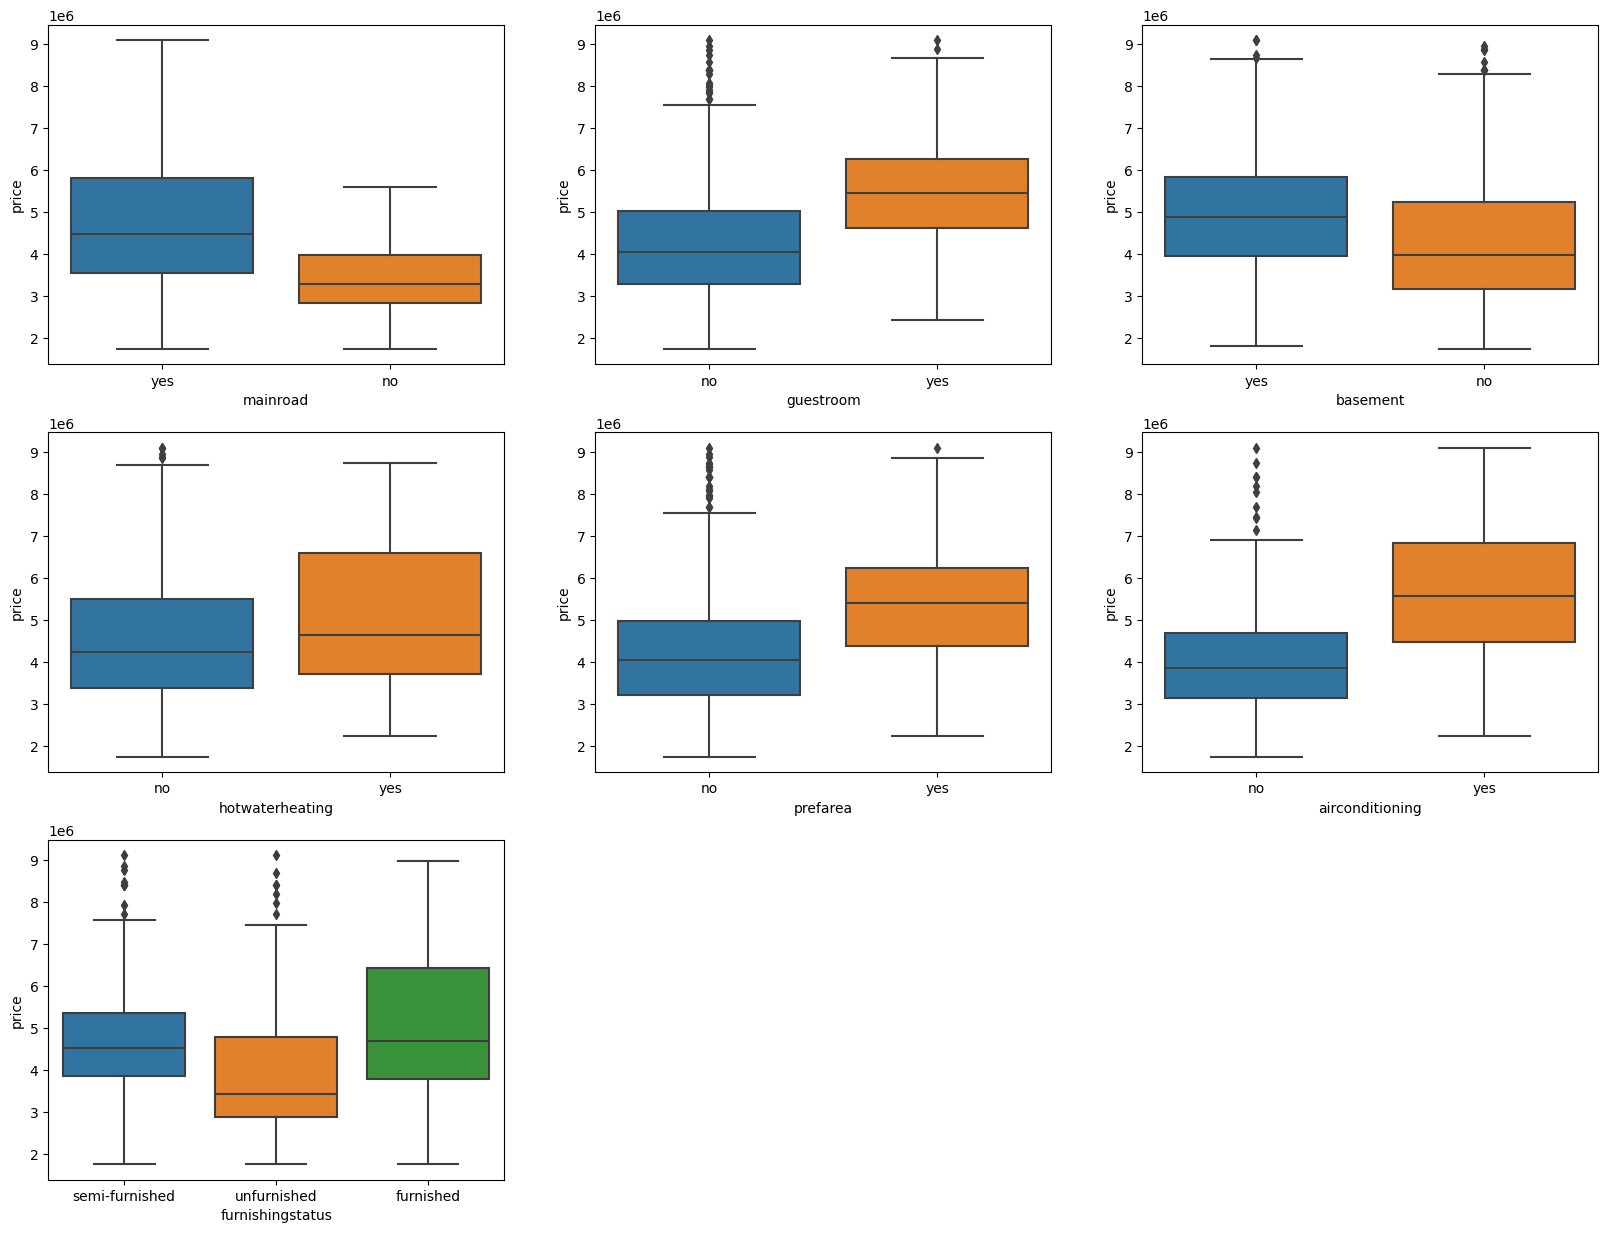

In [12]:
plot.figure(figsize=(20,15))
plot.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price', data=data)
plot.subplot(3,3,2)
sns.boxplot(x='guestroom', y='price', data=data)
plot.subplot(3,3,3)
sns.boxplot(x='basement', y='price', data=data)
plot.subplot(3,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=data)
plot.subplot(3,3,5)
sns.boxplot(x='prefarea', y='price', data=data)
plot.subplot(3,3,6)
sns.boxplot(x='airconditioning', y='price', data=data)
plot.subplot(3,3,7)
sns.boxplot(x='furnishingstatus', y='price', data=data)
plot.show()

In [13]:
# Data Preparation: converting Yes/No to booleans(True/False) using Dummies from Pandas
data = pd.get_dummies(data, drop_first= True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,True,False,True,False,False,False,True,False
16,9100000,6600,4,2,2,1,True,True,True,False,True,True,False,True
17,8960000,8500,3,2,4,2,True,False,False,False,True,False,False,False
18,8890000,4600,3,2,2,2,True,True,False,False,True,False,False,False
19,8855000,6420,3,2,2,1,True,False,False,False,True,True,True,False


In [14]:
# Convert boolean True/False to 1/0
data = data.astype(int)
#Look at the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0


In [15]:
# Create features dataset and label's dataset
Y = data.price
# includes the fields other than prices
X = data.iloc[:,1:]

In [16]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,6420,3,2,2,1,1,0,0,0,1,1,1,0


In [17]:
Y.head()

15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
Name: price, dtype: int32

In [18]:
# Testing Multi collinearity
#Standardizatin of data and Calculate VIF: Variable Inflation Factor 

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [19]:
preprocessing(X)

         VIF                         Features
0   5.695074                             area
1   7.370649                         bedrooms
2   1.640001                        bathrooms
3   2.702247                          stories
4   1.912748                          parking
5   5.841277                     mainroad_yes
6   1.521360                    guestroom_yes
7   1.998402                     basement_yes
8   1.077140              hotwaterheating_yes
9   1.745831              airconditioning_yes
10  1.444422                     prefarea_yes
11  2.306936  furnishingstatus_semi-furnished
12  1.941835     furnishingstatus_unfurnished


In [20]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,6420,3,2,2,1,1,0,0,0,1,1,1,0


In [21]:
Y.head()

15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
Name: price, dtype: int32

In [22]:
print(X.shape, Y.shape)

(517, 13) (517,)


In [23]:
# Creating train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(387, 13) (130, 13) (387,) (130,)


In [25]:
# Building Model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

#model training
regression.fit(x_train,y_train)

LinearRegression()

In [26]:
# Predicting from model
y_predict = regression.predict(x_test)

In [27]:
# Summary of the model
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared error (MSE): {mean_squared_error(y_test, y_predict):.2f}')
print(f'Coefficient of Determination (R^2): {r2_score(y_test, y_predict):.2f}')

Mean Squared error (MSE): 1000477717314.24
Coefficient of Determination (R^2): 0.69


In [28]:
y_test.head()

108    6107500
177    5243000
438    3255000
369    3675000
351    3780000
Name: price, dtype: int32

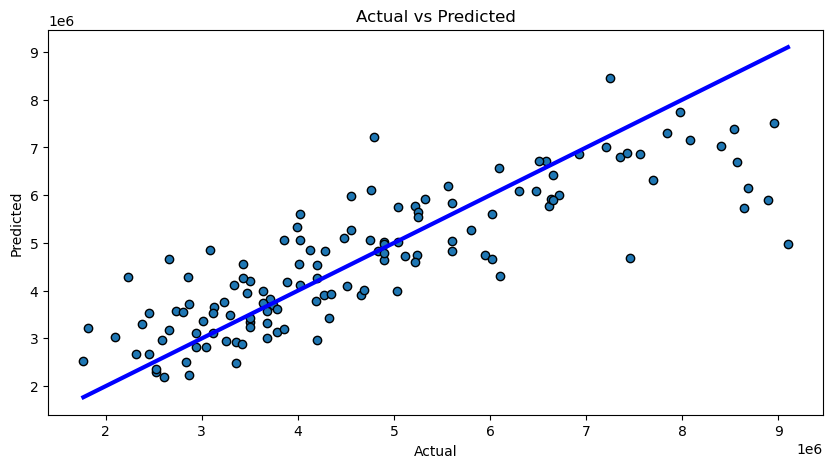

In [29]:
import matplotlib.pyplot as plot

# Plotting the actual vs predicted values
plot.figure(figsize = (10,5))
plot.scatter(y_test,y_predict, edgecolor = (0,0,0))
plot.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color= 'blue', lw=3)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs Predicted')
plot.show()

C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


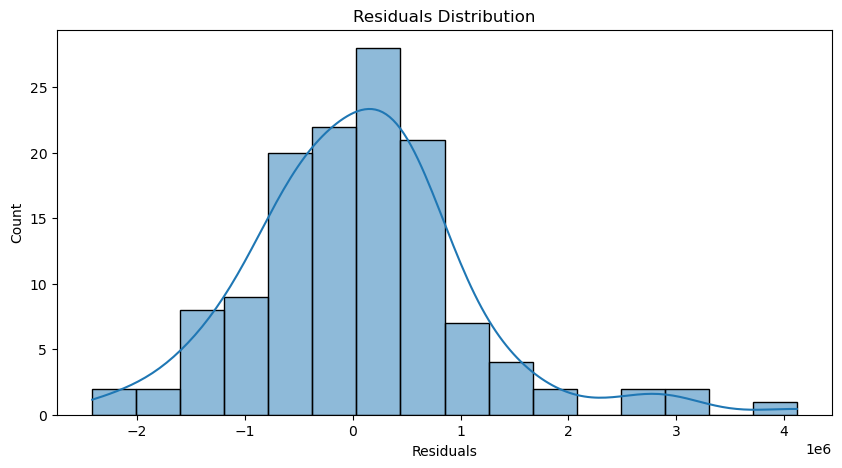

In [30]:
# Creating histograms to show residuals
import seaborn as sns

residuals = y_test - y_predict
plot.figure (figsize = (10,5))
sns.histplot(residuals, kde=True)
plot.xlabel('Residuals')
plot.title('Residuals Distribution')
plot.show()

In [31]:
import statsmodels.api as sm
model_1 = sm.OLS(y_train,x_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):              322610.780
Model:                            OLS   Adj. R-squared (uncentered):         333824.489
Method:                 Least Squares   F-statistic:                             -28.77
Date:                Thu, 13 Feb 2025   Prob (F-statistic):                        1.00
Time:                        15:05:17   Log-Likelihood:                         -5856.8
No. Observations:                 387   AIC:                                  1.174e+04
Df Residuals:                     374   BIC:                                  1.179e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              259.8671     29.210      8.897      0.000     202.431     317.303
bedrooms                         1.451e+05   6.39e+04      2.270      0.024    1.94e+04    2.71e+05
bathrooms                        7.624e+05   1.09e+05      6.966      0.000    5.47e+05    9.78e+05
stories                          4.609e+05   6.82e+04      6.759      0.000    3.27e+05    5.95e+05
parking                          1.395e+05   6.18e+04      2.258      0.024     1.8e+04    2.61e+05
mainroad_yes                     4.652e+05   1.33e+05      3.505      0.001    2.04e+05    7.26e+05
guestroom_yes                    2.405e+05   1.38e+05      1.746      0.082   -3.03e+04    5.11e+05
basement_yes                     3.212e+05   1.14e+05      2.814      0.005    9.67e+04    5.46e+05
hotwaterheating_yes              9.051e+05   2.31e+05      3.920      0.000    4.51e+05    1.36e+06
airconditioning_yes              7.924e+05   1.11e+05      7.113      0.000    5.73e+05    1.01e+06
prefarea_yes                     5.914e+05   1.23e+05      4.809      0.000     3.5e+05    8.33e+05
furnishingstatus_semi-furnished  1.568e+05   1.14e+05      1.371      0.171   -6.81e+04    3.82e+05
furnishingstatus_unfurnished     -1.79e+05   1.17e+05     -1.529      0.127   -4.09e+05    5.13e+04
==============================================================================
Omnibus:                       22.233   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.239
Skew:                           0.446   Prob(JB):                     1.65e-07
Kurtosis:                       4.069   Cond. No.                     2.57e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Create a DataFrame with X_test, y_test, and y_pred
result_DF = x_test.copy()
result_DF['Actual_Prices'] = y_test.values
result_DF['Predicted_Prices'] = y_predict

In [33]:
result_DF

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Actual_Prices,Predicted_Prices
108,3240,4,1,3,1,1,0,0,0,0,0,1,0,6107500,4.298935e+06
177,6050,3,1,1,0,1,0,1,0,0,1,1,0,5243000,4.748729e+06
438,4500,2,1,1,0,0,0,0,0,0,0,1,0,3255000,2.945277e+06
369,3600,2,1,1,0,1,0,0,0,0,0,0,0,3675000,3.014119e+06
351,3600,2,1,1,0,1,0,0,0,0,0,1,0,3780000,3.126922e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2400,3,1,1,0,0,0,0,0,0,0,1,0,1767150,2.526683e+06
192,6600,3,1,1,0,1,1,1,0,0,1,0,0,5040000,5.029329e+06
464,4500,2,1,2,1,1,0,0,1,0,0,1,0,3080000,4.845392e+06
173,5300,4,2,1,0,1,0,0,0,1,1,0,1,5250000,5.539646e+06


In [34]:
result_DF['Predicted_Prices']=result_DF['Predicted_Prices'].apply(lambda x: '{:.2f}'.format(x))

In [35]:
result_DF['Predicted_Prices']= pd.to_numeric(result_DF['Predicted_Prices'])
result_DF

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Actual_Prices,Predicted_Prices
108,3240,4,1,3,1,1,0,0,0,0,0,1,0,6107500,4298935.12
177,6050,3,1,1,0,1,0,1,0,0,1,1,0,5243000,4748728.84
438,4500,2,1,1,0,0,0,0,0,0,0,1,0,3255000,2945277.15
369,3600,2,1,1,0,1,0,0,0,0,0,0,0,3675000,3014118.75
351,3600,2,1,1,0,1,0,0,0,0,0,1,0,3780000,3126922.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2400,3,1,1,0,0,0,0,0,0,0,1,0,1767150,2526683.18
192,6600,3,1,1,0,1,1,1,0,0,1,0,0,5040000,5029328.69
464,4500,2,1,2,1,1,0,0,1,0,0,1,0,3080000,4845392.39
173,5300,4,2,1,0,1,0,0,0,1,1,0,1,5250000,5539645.78


In [36]:
result_DF['error']= result_DF['Predicted_Prices']-result_DF['Actual_Prices']
result_DF

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Actual_Prices,Predicted_Prices,error
108,3240,4,1,3,1,1,0,0,0,0,0,1,0,6107500,4298935.12,-1808564.88
177,6050,3,1,1,0,1,0,1,0,0,1,1,0,5243000,4748728.84,-494271.16
438,4500,2,1,1,0,0,0,0,0,0,0,1,0,3255000,2945277.15,-309722.85
369,3600,2,1,1,0,1,0,0,0,0,0,0,0,3675000,3014118.75,-660881.25
351,3600,2,1,1,0,1,0,0,0,0,0,1,0,3780000,3126922.20,-653077.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2400,3,1,1,0,0,0,0,0,0,0,1,0,1767150,2526683.18,759533.18
192,6600,3,1,1,0,1,1,1,0,0,1,0,0,5040000,5029328.69,-10671.31
464,4500,2,1,2,1,1,0,0,1,0,0,1,0,3080000,4845392.39,1765392.39
173,5300,4,2,1,0,1,0,0,0,1,1,0,1,5250000,5539645.78,289645.78


In [37]:
#Alternative models for performance improvement
# Importing required models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [39]:
# Train models
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
rf.fit(x_train, y_train)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [40]:
# Predictions
ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)
rf_pred = rf.predict(x_test)
gbr_pred = gbr.predict(x_test)


In [41]:
# Evaluate models
models = {
    "Ridge Regression": ridge_pred,
    "Lasso Regression": lasso_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gbr_pred
}

model_performance = {}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = {"MSE": mse, "R² Score": r2}


In [42]:
# Display performance comparison
pd.DataFrame(model_performance).T

,MSE,R² Score
Ridge Regression,9.980783e+11,0.695680
Lasso Regression,1.000478e+12,0.694949
Random Forest,1.206647e+12,0.632087
Gradient Boosting,9.932290e+11,0.697159


In [43]:
#Ridge model with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [44]:
# Define Ridge hyperparameter grid
ridge_params = {'alpha': [0.1, 1, 10, 50, 100, 200]}

In [45]:
# Perform Grid Search for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 50, 100, 200]}, scoring='r2')

In [46]:
# Best Ridge model
best_ridge = ridge_grid.best_estimator_
best_ridge_pred = best_ridge.predict(x_test)

In [47]:
# Evaluate best Ridge model
best_ridge_mse = mean_squared_error(y_test, best_ridge_pred)
best_ridge_r2 = r2_score(y_test, best_ridge_pred)

In [48]:
# Display best Ridge results
ridge_grid.best_params_, best_ridge_mse, best_ridge_r2

({'alpha': 1}, 998078307882.932, 0.695680278024014)

# Conclusion

=> Model Performance Analysis:
The Mean Squared Error (MSE) is around 1.00 × 10¹², indicating a considerable prediction error.
The R² score (0.69) suggests that 69% of the variance in housing prices is explained by the model. While this is a moderate score, there is still room for improvement.

=> Comparison of Regression Models:
Gradient Boosting performed the best with the highest R² score (0.697) and the lowest MSE, making it the most suitable model among those tested.
Ridge and Lasso Regression performed similarly, effectively handling multicollinearity.
Random Forest showed the lowest R² score (0.63), suggesting it may not be the best choice for this dataset.

=> Key Feature Importance
Significant Features:
Area, bedrooms, bathrooms, and stories have strong positive correlations with price.
Amenities such as air conditioning, main road access, and guest rooms significantly impact housing prices.
Furnishing Status:
Furnished houses have the highest prices, while unfurnished houses negatively impact price.

=> Multicollinearity Check (VIF Analysis):
Bedrooms (VIF = 7.37) and area (VIF = 5.69) show relatively high multicollinearity, which could slightly affect model stability.
Other features have acceptable VIF values, meaning multicollinearity is not a major concern.

=> Residual Analysis & Error Distribution:
The residual histogram suggests a near-normal distribution, but some skewness exists, indicating slight bias in predictions.
The Actual vs. Predicted plot shows a strong correlation but reveals some variance and dispersion around the regression line, suggesting some errors in prediction.

=> Insights from Boxplots:
Homes with air conditioning, guest rooms, and main road access tend to have higher median prices.
Furnished homes command higher prices, while unfurnished homes tend to be lower in value.
